# Classification example

On Iris dataset

In [1]:
import random
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline

from pycgp.mutation import probabilistic_mutation
from pycgp.evolution import evolution
from pycgp.benchmarks.classification import PARAMS, EV_PARAMS

Import IRIS data

In [2]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Function for custom onehot encoding

In [3]:
# custom onehot encoding
y_train_oh = []
for label in y_train:
    vec = [0]*4
    vec[label] = 1
    y_train_oh.append(vec)

def decode_label(vec):
    try:
        return vec.index(1)
    except ValueError:
        return 0

In [4]:
from scipy.special import expit

def decode_to_target(y):
    y = np.array(y)
    y[y == None] = 1
    y = y.astype(int)
    labels = np.round(expit(y))
    int_labels = []
    for label in labels:
        int_labels.append(decode_label(label.tolist()))
    return int_labels

def cost_function(y_true, y):
    int_labels = decode_to_target(y)
        
    return -accuracy_score(int_labels, y_true)


In [5]:
%%time
random.seed(0)
PARAMS['n_cols'] = 50
PARAMS['n_inputs'] = 4
PARAMS['n_outputs'] = 4
EV_PARAMS['max_evaluations'] = 20000
EV_PARAMS['mutation'] = probabilistic_mutation
EV_PARAMS['cost_func'] = cost_function
result = evolution(PARAMS, EV_PARAMS, X_train, y_train, verbose=True)

Evolution ended with 20001 of cost function evaluations
Final population:
Fitness: -0.9523809523809523, function: plog(x2,x1)
Fitness: -0.6952380952380952, function: plog(x2,x3)
Fitness: -0.4666666666666667, function: sin(x2,plog(cos(x0,add(x2,x0)),sin(x3,x3)))
Fitness: -0.3333333333333333, function: plog(x2,x1)
Fitness: -0.3238095238095238, function: cos(plog(cos(x0,add(x2,x3)),x1),x3)
CPU times: user 1min 33s, sys: 172 ms, total: 1min 34s
Wall time: 1min 38s


Pick the best individual

In [6]:
best = result['final'][0]

Accuracy of best individual on test dataset

In [7]:
cost_function(y_test, best.execute(X_test))

-0.9555555555555556

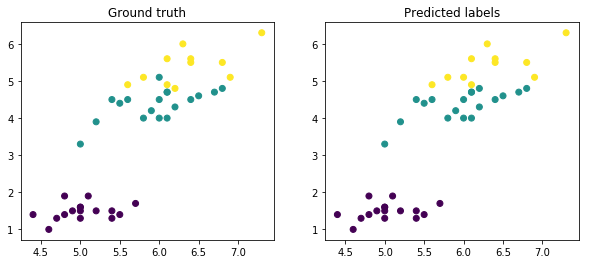

In [8]:
predicted_labels = decode_to_target(best.execute(X_test))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
ax1.scatter(X_test[:,0], X_test[:,2], c=y_test)
ax1.set_title('Ground truth')
ax2.scatter(X_test[:,0], X_test[:,2], c=predicted_labels)
ax2.set_title('Predicted labels')

Output to graph

In [10]:
from pycgp.visualize import to_graph
to_graph(best, 'result')

# Visualization of best individuals during evolution

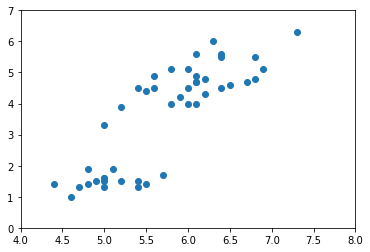

In [13]:
import numpy as np

import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

from pycgp.counter import Counter

fig, ax = plt.subplots()

ax.set_xlim((4,8))
ax.set_ylim((0,7))

scat = ax.scatter(X_test[:,0], X_test[:, 2])

def get_colors(vec):
    colors = []
    for label in vec:
        if label == 0:
            colors.append('green')
        if label == 1:
            colors.append('blue')
        if label == 2:
            colors.append('red')
    return colors

def init():
    return scat,

def animate(i):
    ind = Counter.get().dict['best_individual'][i]
    labels = decode_to_target(ind.execute(X_test))
    ax.set_title('generation {}, fitness: {:2f}'.format(i, ind.fitness))
    scat.set_color(get_colors(labels))
    return scat,

n_frames = len(Counter.get().dict['best_individual'])

symanim = animation.FuncAnimation(fig, animate, init_func=init, frames=n_frames, interval=5, blit=True)


In [14]:
%%time
HTML(symanim.to_html5_video())

CPU times: user 8min 57s, sys: 4min 47s, total: 13min 45s
Wall time: 7min 1s
